In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import operator as op
import itertools
import matplotlib.pyplot as plt
import numpy.linalg
import cmath
import multiprocessing
import itertools
import scipy.optimize as optimize

In [2]:
# Δεδομένα
df = pd.read_csv('sx-stackoverflow.txt', sep="\s+", header = None)
# Ονομάσια στις στήλες
df.columns = ["source_id", "target_id", "timestamp"]
df.head(5) # First 5 rows

,source_id,target_id,timestamp
0,9,8,1217567877
1,1,1,1217573801
2,13,1,1217606247
3,17,1,1217617639
4,48,2,1217618182


In [3]:
# Create a small dataset of 200 rows first 100 and last 100
dataset = pd.concat([df.iloc[:100], df.iloc[-100:]]) 

In [4]:
# Υπολογισμός των χρονικών στιγμών t_min, t_max, ΔΤ, δτ
N = int(input('Enter Number Of Intervals: ')) # User Input

t_min = dataset.timestamp.min()
t_max = dataset.timestamp.max()

DT = t_max - t_min
dt = DT / N

print('Minimum Timestamp = ', t_min)
print('Maximum Timestamp = ', t_max)
print('DT = ', DT)
print('χρονική διάρκεια: ', dt)

Enter Number Of Intervals: 5
Minimum Timestamp =  1217567877
Maximum Timestamp =  1457273428
DT =  239705551
χρονική διάρκεια:  47941110.2


In [5]:
# Διαμέριση του συνολικού χρονικού διαστήματος
def create_intervals(dataset,N):
    
    intervals = []
    for j in range(0,N):
        
        #Start of time interval
        tj = t_min + j * dt
        
        #End of time interval
        tj1 = t_min + (j+1) * dt

        intervals.append([int(tj),int(tj1)])

    return(intervals)

In [25]:
time_intervals = create_intervals(dataset,N)
print('Time Intervals: ', time_intervals)

Time Intervals:  [[1217567877, 1241538432], [1241538432, 1265508987], [1265508987, 1289479542], [1289479542, 1313450097], [1313450097, 1337420652], [1337420652, 1361391207], [1361391207, 1385361762], [1385361762, 1409332317], [1409332317, 1433302872], [1433302872, 1457273428]]


Nodes:  181
Edges:  175


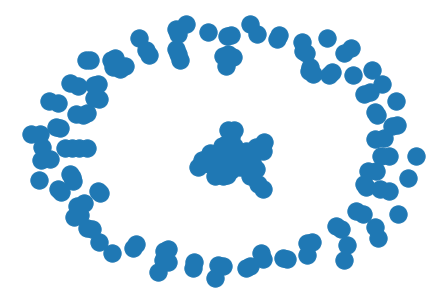

In [6]:
# Returns a graph from Pandas DataFrame containing an edge list.
G = nx.from_pandas_edgelist(dataset, 'source_id', 'target_id', 'timestamp')
print('Nodes: ',G.number_of_nodes())
print('Edges: ',G.number_of_edges())
E = G.edges()
nx.draw(G)

In [7]:
def centrality_plots(G):
    
    # Compute the degree centrality: deg_cent
    deg_cent = nx.degree_centrality(G)
    # Compute the in degree centrality: in_deg_cent
#     in_deg_cent = nx.in_degree_centrality(G)
    # Compute the Out-Degree Centrality: out_deg_cent
#     out_deg_cent = nx.out_degree_centrality(G)
    # Compute the closeness Centrality: clo_cent
    clo_cent = nx.closeness_centrality(G)
    # Compute the Betweenness Centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    # Compute the Eigenvector Centrality: eig_cent
    eig_cent = nx.eigenvector_centrality(G)
    # Compute the Katz Centrality: katz_cent
    L = nx.normalized_laplacian_matrix(G)
    e = numpy.linalg.eigvals(L.A)
    katz_cent = nx.katz_centrality_numpy(G, max(e).real)
    
    # degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

    # Plots 
    fig, axs = plt.subplots(3, 2, figsize=(15,15))

    # Plot a histogram of the degree centrality distribution of the graph.
    deg_cent_values = np.asarray(list(deg_cent.values())) 
    axs[0][0].set_ylabel('Relative Frequency')
    axs[0][0].set_title('degree centrality')
    axs[0][0].hist(deg_cent_values, weights = np.zeros_like(deg_cent_values) + 1. / deg_cent_values.size)
    
    # Plot a histogram of the closeness Centrality distribution of the graph
    clo_cent_values = np.asarray(list(clo_cent.values())) 
    axs[0][1].set_title('Closeness Centrality')
    axs[0][1].hist(clo_cent_values, weights = np.zeros_like(clo_cent_values) + 1. / clo_cent_values.size)

    # Plot a histogram of the Betweenness Centrality distribution of the graph
    bet_cent_values = np.asarray(list(bet_cent.values())) 
    axs[1][0].set_title('Betweenness Centrality')
    axs[1][0].hist(bet_cent_values, weights = np.zeros_like(bet_cent_values) + 1. / clo_cent_values.size)

    # Plot a histogram of the Eigenvector Centrality distribution of the graph
    eig_cent_value = np.asarray(list(eig_cent.values())) 
    axs[1][1].set_title('Eigenvector Centrality')
    axs[1][1].hist(eig_cent_value, weights = np.zeros_like(eig_cent_value) + 1. / clo_cent_values.size)

    # Plot a histogram of the Katz Centrality distribution of the graph
    katz_cent_value = np.asarray(list(katz_cent.values())) 
    axs[2][0].set_title('Katz Centrality')
    axs[2][0].set_xlabel('Normalized Centrality Measure Values')
    axs[2][0].hist(katz_cent_value, weights = np.zeros_like(katz_cent_value) + 1. / katz_cent_value.size)



    plt.show()

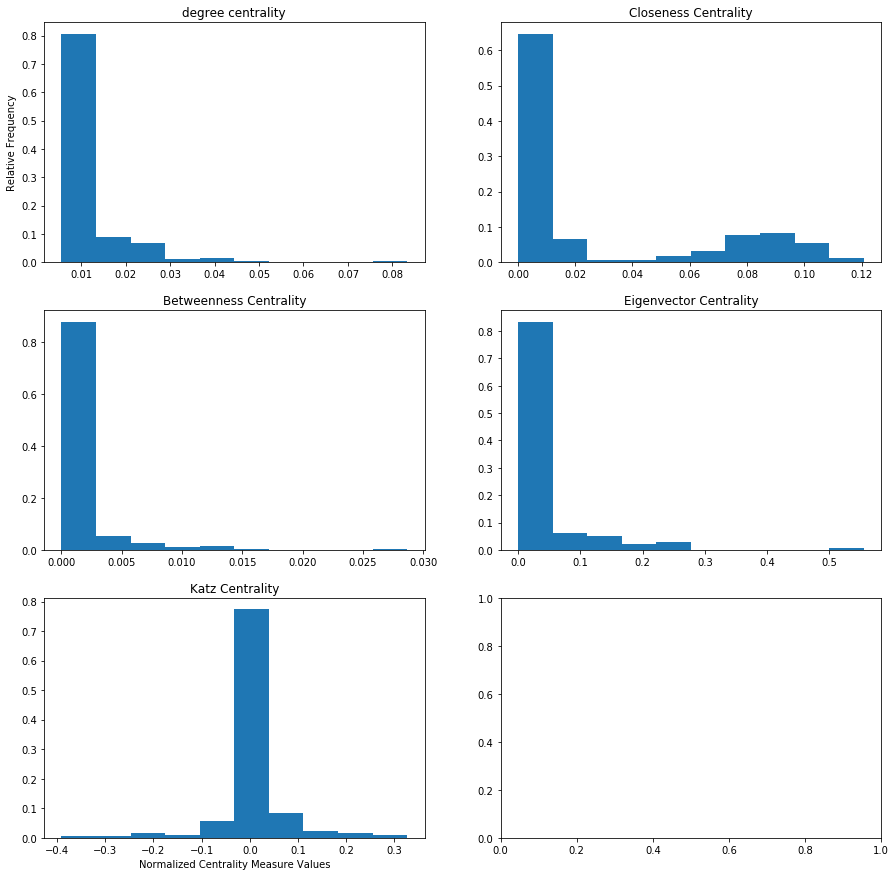

In [8]:
centrality_plots(G)

In [ ]:
t0 = t_min
t1 = t0+dt
SetOfNodes=[]
SetOfEdges=[]
while N > 0:
    T = nx.DiGraph()
    for e in E:
        a=e[0]; b=e[1]
        ts=int(G[a][b]['timestamp'])
        if (ts >= t0) and (ts < t1):
            T.add_edge(a,b)
        A=set(T.nodes());
        B=set(T.edges());
        SetOfNodes.append(A)
        # print('set of nodes: ', SetOfNodes)
        SetOfEdges.append(B)
        
        nx.draw(T)
        # print(T)
            
    # T = nx.from_pandas_edgelist(dataset, 'source_id', 'target_id', 'timestamp')
    # nx.draw(T)
    N -= 1